In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [2]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [6]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = 'LAPTOP-2R1SCPJG\SQLEXPRESS'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


# Recolección de datos

## Plagas

In [7]:
dFechaInicio = '2019-08-07'
dFechaFin = '2019-09-07'

In [23]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

## Clima

In [9]:
data_weather = pd.ExcelFile('D:/bibliografia de tesis/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [10]:
df_weather = df_weather[df_weather['Año'] == 2019]

In [15]:
df_weather = df_weather[(df_weather['Semana'] >= 31) & (df_weather['Semana'] <= 36)]

In [16]:
df_weather.head()

,Año,Semana,Mes,Fecha,ET(mm).,Tº MIN/DIA (°C),Tº MAX/DIA (°C),Dif. Térmico,T° Prom <15 °C,T° Prom 15 a 17 °C,...,HR > 85%,HR > 90%,HR > 95%,Nº Hrs Rocio Día,Humedad Relativa Mín.(%),Humedad Relativa Max.(%),Velocidad del Viento Promedio (km/hr),Dirección del Viento (07:00 pm),LR Máx. (M3/Ha/Día),Precipit. MM3
1304,2019,31,Julio,2019-07-28,0.8,14.7,18.8,4.1,3.0,18.5,...,22.0,16.0,0.0,0.5,82.0,94.0,1.5,sursureste,30.0,0.0
1305,2019,31,Julio,2019-07-29,0.4,14.2,15.8,1.6,14.5,9.5,...,24.0,24.0,5.5,8.0,90.0,95.0,1.5,sursuroeste,30.0,0.2
1306,2019,31,Julio,2019-07-30,1.0,12.5,19.0,6.5,15.5,4.0,...,18.5,15.0,7.0,10.0,76.0,95.0,1.4,oeste,30.0,0.6
1307,2019,31,Julio,2019-07-31,0.0,9.8,13.3,3.5,11.5,4.0,...,15.0,11.5,1.0,4.0,73.0,96.0,2.2,suroeste,30.0,0.0
1308,2019,31,Agosto,2019-08-01,1.8,14.6,21.6,7.0,5.5,12.0,...,17.0,12.5,0.0,0.0,73.0,93.0,1.7,oestesuroeste,30.0,0.0


In [17]:
df_weather.reset_index(drop = True, inplace = True)

In [18]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [24]:
arrFiltrados = df['Filtrado'].unique()

In [25]:
### Relación entre las variables

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2903
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


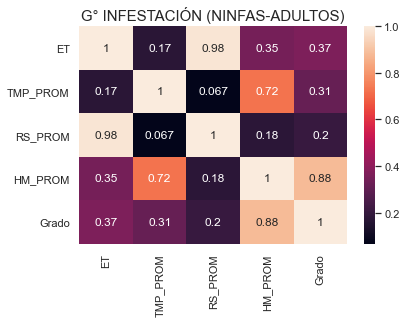

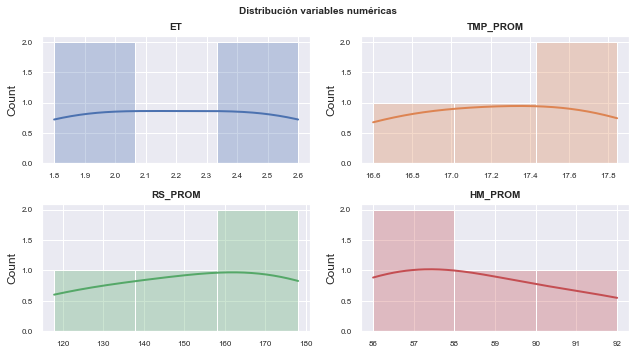

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2940
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


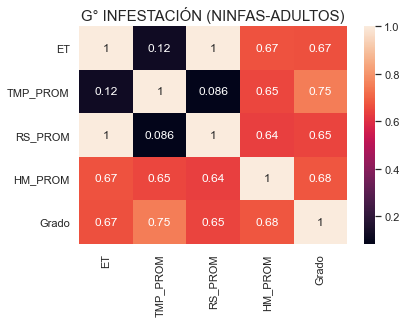

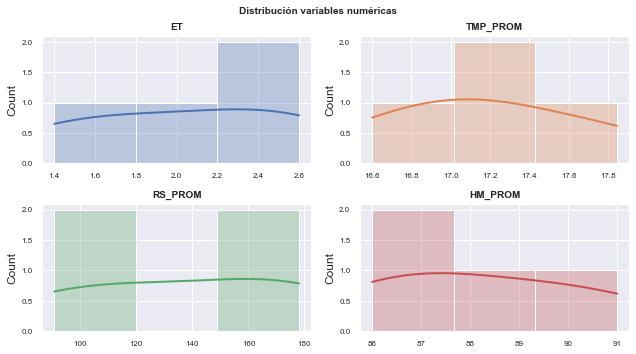

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3001
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


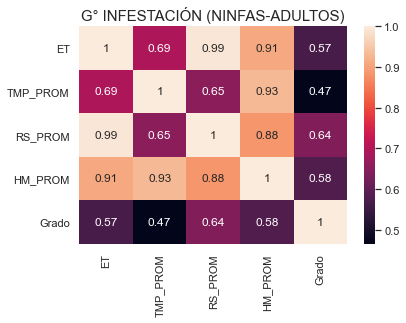

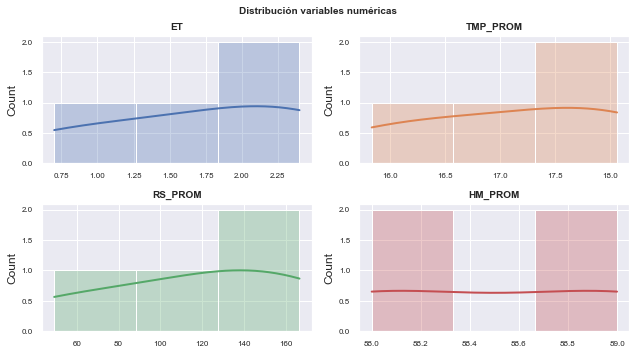

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3006
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


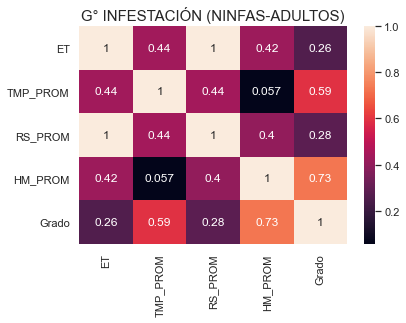

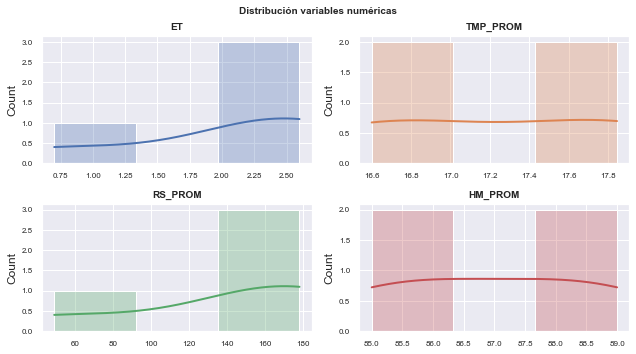

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3023
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


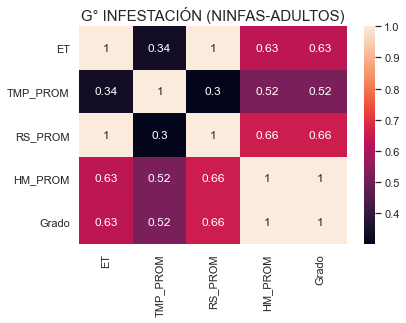

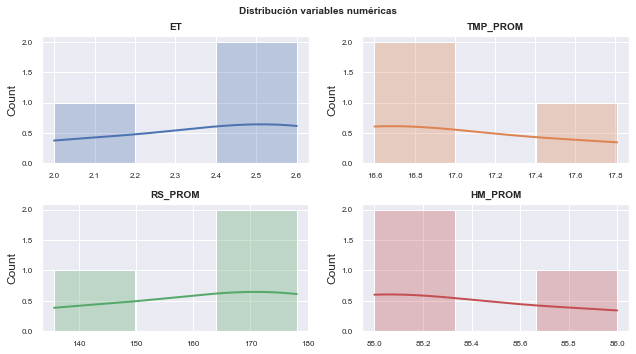

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3027
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


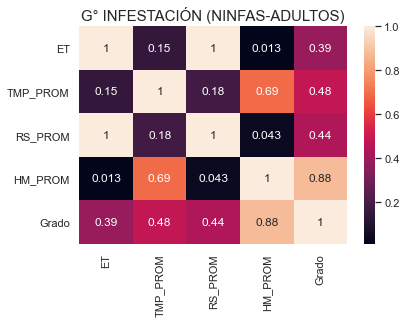

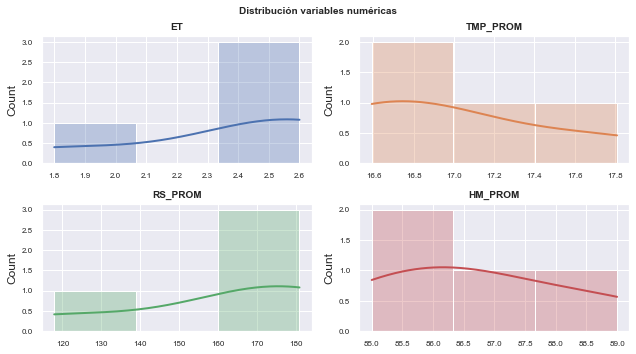

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3028
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


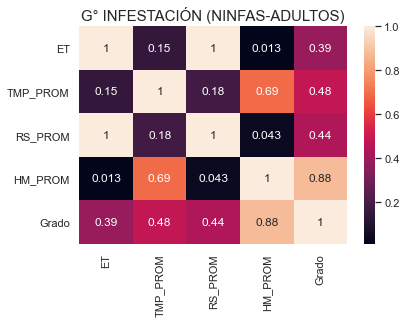

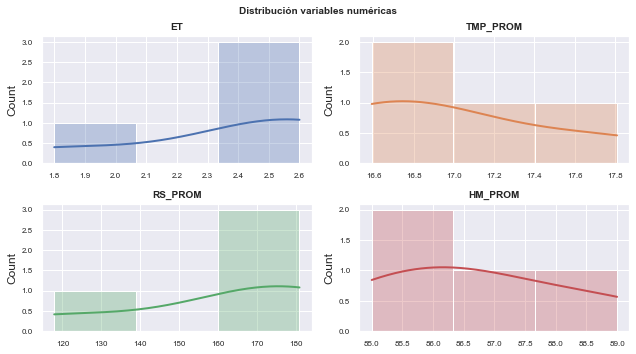

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3029
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


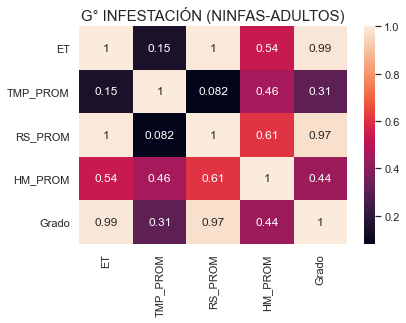

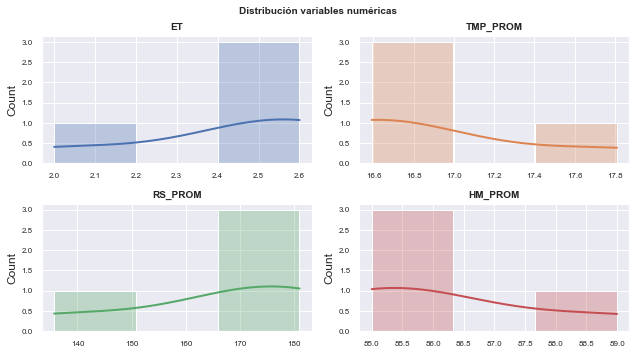

In [31]:
arrPlagas = []
dfBemisia = df[df['Plaga'] == 'BEMISIA TABACI']
dfFilter = dfBemisia
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()                   
                
                for caracteristica in arrPlagaxCarac: 
                    
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    # Filtrar el dataset por las variables que se usarán
                    #df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Grado']]        
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                    #print(df_union)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                        arrPlagas.append(plaga + ' ' + caracteristica)
                        #Creando Mapa de Calor
                        sns.set()
                        
                        print('------------------------------------------------------------')
                        print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                        print('Plaga: ', plaga)
                        print('Caracteristica: ', caracteristica)      
                        
                        print('------------------------------------------------------------')
                        
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                        #plt.show()
                        
                        # Gráfico de distribución para cada variable numérica
                        # ==============================================================================
                        # Ajustar número de subplots en función del número de columnas

                        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
                        axes = axes.flat
                        columnas_numeric = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']].select_dtypes(include=['float64', 'int']).columns

                        for i, colum in enumerate(columnas_numeric):
                            sns.histplot(
                                data    = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']],
                                x       = colum,
                                stat    = "count",
                                kde     = True,
                                color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                                line_kws= {'linewidth': 2},
                                alpha   = 0.3,
                                ax      = axes[i]
                            )
                            axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
                            axes[i].tick_params(labelsize = 8)
                            axes[i].set_xlabel("")



                        fig.tight_layout()
                        plt.subplots_adjust(top = 0.9)
                        fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

                        plt.show()
                        
                        
                        

In [27]:
arrPlagas = np.array(arrPlagas)
pd.unique(arrPlagas)

array(['OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI G° INFESTACIÓN (HUEVOS)',
       'TRIPS TABACI G° NINFAS Y ADULTOS/ INFLORESC.',
       'BEMISIA TABACI G° INFESTACIÓN (NINFAS-ADULTOS)',
       'ALEURODICUS COCOIS, ALEURODICUS JULEIKAE G° INFESTACIÓN (NINFAS-ADULTOS)',
       'OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI G° INFESTACIÓN (NINFAS-ADULTOS)'],
      dtype='<U73')